In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 21.7 MB/s eta 0:00:00


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/FINAL_DATASET.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/FINAL_DATASET')


# PREPROCESSING

IMAGE RESIZING

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
import cv2
import os

def resize_images(image_folder, output_folder, size=(640, 640)):
    os.makedirs(output_folder, exist_ok=True)
    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            resized_image = cv2.resize(image, size)
            cv2.imwrite(os.path.join(output_folder, image_name), resized_image)

resize_images('/content/FINAL_DATASET/FINAL_DATASET/train/images', '/content/FINAL_DATASET/FINAL_DATASET/train/resized_images')



In [ ]:
import cv2
import os

def resize_images(image_folder, output_folder, size=(640, 640)):
    os.makedirs(output_folder, exist_ok=True)
    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            resized_image = cv2.resize(image, size)
            cv2.imwrite(os.path.join(output_folder, image_name), resized_image)

resize_images('/content/FINAL_DATASET/FINAL_DATASET/val/images', '/content/FINAL_DATASET/FINAL_DATASET/val/resized_images')


IMAGE NORMALIZATION

In [ ]:
import os
import cv2
import numpy as np

def normalize_images_in_directory(directory_path):

    # Create a directory for the normalized images
    normalized_dir = os.path.join(directory_path, "normalized")
    os.makedirs(normalized_dir, exist_ok=True)

    for filename in os.listdir(directory_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Load the image
            img_path = os.path.join(directory_path, filename)
            image = cv2.imread(img_path)

            if image is not None:
                # Normalize the image by dividing by 255.0 to scale pixel values to [0, 1]
                normalized_image = image / 255.0

                # Save the normalized image (scaled back to [0, 255] for saving, converted to uint8)
                normalized_img_path = os.path.join(normalized_dir, filename)
                cv2.imwrite(normalized_img_path, (normalized_image * 255).astype(np.uint8))

    print(f"All images have been normalized and saved in {normalized_dir}")

# Example usage
directory_path = '/content/FINAL_DATASET/FINAL_DATASET/train/resized_images'
normalize_images_in_directory(directory_path)


All images have been normalized and saved in /content/FINAL_DATASET/FINAL_DATASET/train/resized_images/normalized


In [ ]:
directory_path = '/content/FINAL_DATASET/FINAL_DATASET/val/resized_images'
normalize_images_in_directory(directory_path)

All images have been normalized and saved in /content/FINAL_DATASET/FINAL_DATASET/val/resized_images/normalized


DATA AUGUMENTATION

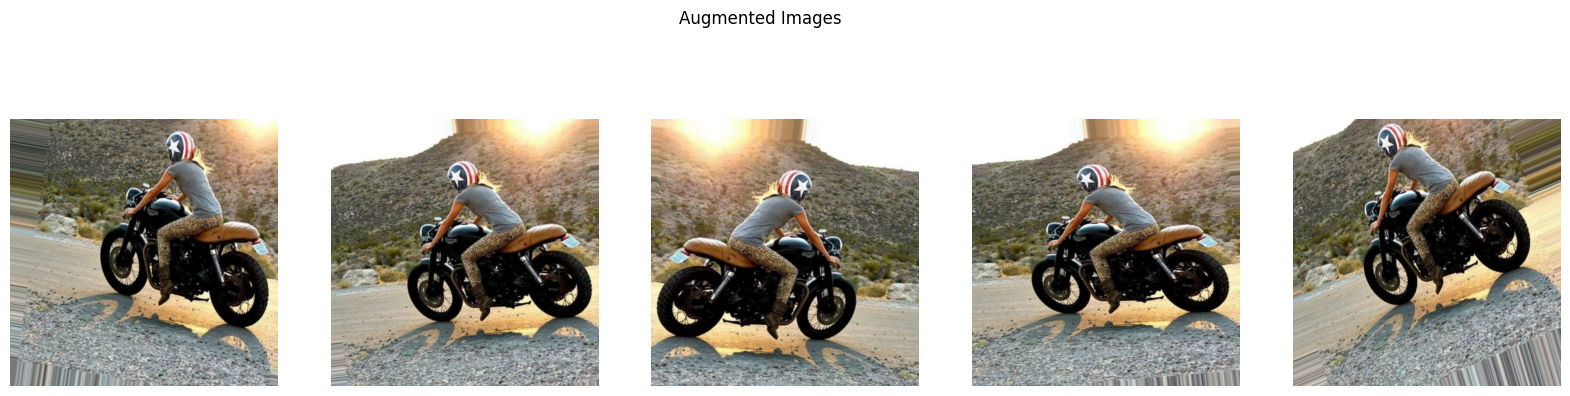

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Load a sample image (update with your image path)
image_path = '/content/FINAL_DATASET/FINAL_DATASET/train/resized_images/normalized/moto6.jpg'  # Update this with your image file path
image = load_img(image_path)  # Load the image using Keras
image_array = img_to_array(image)  # Convert the image to an array
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Initialize the ImageDataGenerator with augmentation parameters
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images and plot a few of them
augmented_images = data_gen.flow(image_array, batch_size=1)

# Plot a few augmented images
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    augmented_image = augmented_images.__next__()[0].astype('uint8')  # Use __next__() to get the next augmented image
    axes[i].imshow(augmented_image)
    axes[i].axis('off')

fig.suptitle("Augmented Images")
plt.show()


# EDA

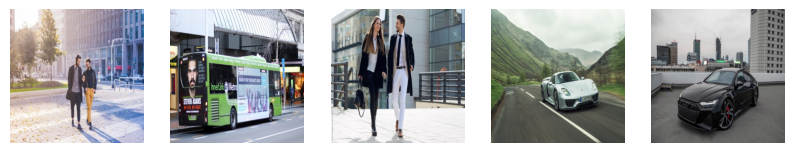

In [ ]:
import matplotlib.pyplot as plt
import os

def display_sample_images(image_folder, num_images=5):
    images = os.listdir(image_folder)[:num_images]
    plt.figure(figsize=(10, 5))
    for i, image_name in enumerate(images):
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Example usage
display_sample_images('/content/FINAL_DATASET/FINAL_DATASET/train/resized_images/normalized')


In [ ]:
def analyze_image_dimensions(image_folder):
    widths, heights = [], []
    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            heights.append(image.shape[0])
            widths.append(image.shape[1])

    print("Average Width:", np.mean(widths))
    print("Average Height:", np.mean(heights))
    print("Width Range:", (min(widths), max(widths)))
    print("Height Range:", (min(heights), max(heights)))

# Example usage
analyze_image_dimensions('/content/FINAL_DATASET/FINAL_DATASET/train/resized_images/normalized')


Average Width: 640.0
Average Height: 640.0
Width Range: (640, 640)
Height Range: (640, 640)


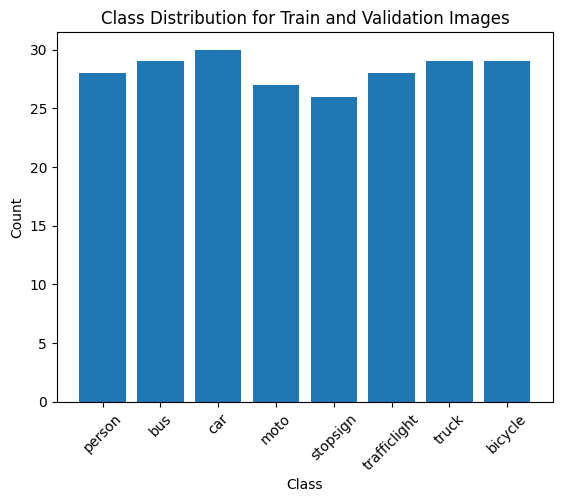

In [ ]:
import os
from collections import Counter
import matplotlib.pyplot as plt

def analyze_class_distribution(train_dir, val_dir):
    labels = []

    # List all files in the train directory
    for filename in os.listdir(train_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image files
            # Extract class name from the file name
            class_name = ''.join([char for char in filename if not char.isdigit()]).split('.')[0]
            labels.append(class_name)

    # List all files in the val directory
    for filename in os.listdir(val_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image files
            # Extract class name from the file name
            class_name = ''.join([char for char in filename if not char.isdigit()]).split('.')[0]
            labels.append(class_name)

    # Count the occurrences of each class
    class_counts = Counter(labels)

    # Plot the class distribution
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution for Train and Validation Images')
    plt.xticks(rotation=45)
    plt.show()

# Example usage
train_directory = '/content/FINAL_DATASET/FINAL_DATASET/train/resized_images/normalized'
val_directory = '/content/FINAL_DATASET/FINAL_DATASET/val/resized_images/normalized'
analyze_class_distribution(train_directory, val_directory)


# TRAINING

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

# Train the model
model.train(data='/content/FINAL_DATASET/FINAL_DATASET/data.yaml', epochs=50, imgsz=640, batch=16)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 262MB/s]


Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/FINAL_DATASET/FINAL_DATASET/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 21.6MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 85.5MB/s]


AMP: checks passed ✅


train: Scanning /content/FINAL_DATASET/FINAL_DATASET/train/labels... 158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 158/158 [00:00<00:00, 1461.20it/s]

train: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/train/images/bicycle1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/train/images/bicycle10.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/train/images/bicycle11.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/train/images/bicycle12.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/train/images/bicycle13.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/train/images/bicycle14.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/train/images/bicycle15.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/train/images/bicycle16.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/train/images/bicycle17.jpg: 1 duplicate labels removed
train: WARN

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/FINAL_DATASET/FINAL_DATASET/val/labels... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<00:00, 1143.37it/s]

val: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/val/images/bicycle22.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/val/images/bicycle23.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/val/images/bicycle24.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/val/images/bicycle25.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/val/images/bicycle26.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/val/images/bicycle27.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/val/images/bicycle28.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/val/images/bicycle29.jpg: 5 duplicate labels removed
val: WARNING ⚠️ /content/FINAL_DATASET/FINAL_DATASET/val/images/bicycle30.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/FINAL_DATASET/FINAL_D

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.07G     0.7669      9.048      1.189         59        640: 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all         68        105      0.453      0.462      0.364      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         4G     0.6492      2.274      1.068         40        640: 100%|██████████| 10/10 [00:03<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         68        105      0.831      0.694      0.785       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.01G     0.6751      1.567      1.045         52        640: 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         68        105      0.826      0.868      0.892      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       3.9G     0.6324      1.277      1.027         57        640: 100%|██████████| 10/10 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         68        105      0.885      0.853      0.877      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.06G     0.7371      1.246      1.051         58        640: 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         68        105      0.889      0.816      0.859      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.06G     0.6897      1.068      1.061         53        640: 100%|██████████| 10/10 [00:03<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all         68        105      0.802      0.735      0.791       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.87G     0.7216      1.155       1.07         50        640: 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]


                   all         68        105      0.683      0.665      0.685       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.03G     0.6867      1.049      1.037         38        640: 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]


                   all         68        105      0.712      0.728      0.738      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       3.9G     0.7291      1.053      1.084         39        640: 100%|██████████| 10/10 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all         68        105      0.843      0.624       0.74      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.04G     0.6983     0.9478      1.054         40        640: 100%|██████████| 10/10 [00:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]


                   all         68        105      0.788      0.754      0.805      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.03G     0.7651      0.917      1.089         48        640: 100%|██████████| 10/10 [00:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         68        105      0.636      0.692      0.673      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.04G     0.7234     0.8874      1.074         37        640: 100%|██████████| 10/10 [00:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.95it/s]

                   all         68        105      0.782       0.65      0.779      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.02G     0.6649     0.8435      1.032         42        640: 100%|██████████| 10/10 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         68        105      0.789      0.783      0.798      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.89G     0.6916     0.8221       1.06         50        640: 100%|██████████| 10/10 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]

                   all         68        105      0.689      0.742      0.742      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         4G     0.7043     0.8315      1.068         43        640: 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]

                   all         68        105      0.793      0.709      0.744      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.05G     0.6802     0.8545      1.056         49        640: 100%|██████████| 10/10 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         68        105      0.858      0.686      0.739      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.98G     0.6375     0.7545      1.018         43        640: 100%|██████████| 10/10 [00:03<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         68        105      0.868       0.71      0.779      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.06G     0.6409     0.7301      1.022         38        640: 100%|██████████| 10/10 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]

                   all         68        105      0.749      0.751      0.782       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.03G     0.6644     0.7299      1.027         41        640: 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         68        105      0.795      0.782      0.837      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.05G     0.6507     0.7179       1.02         49        640: 100%|██████████| 10/10 [00:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         68        105      0.807      0.832      0.864      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.87G     0.6142     0.6607      1.019         51        640: 100%|██████████| 10/10 [00:02<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.95it/s]

                   all         68        105      0.831       0.83      0.876      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.05G       0.63     0.6703      1.009         53        640: 100%|██████████| 10/10 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.01it/s]

                   all         68        105      0.851       0.81      0.877      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.87G     0.5737     0.6391      1.015         45        640: 100%|██████████| 10/10 [00:03<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         68        105      0.881      0.801      0.834      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.87G      0.553     0.5555     0.9686         51        640: 100%|██████████| 10/10 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]

                   all         68        105      0.871      0.794      0.823      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.02G     0.6159       0.62      1.017         51        640: 100%|██████████| 10/10 [00:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]

                   all         68        105      0.887      0.793      0.877      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.89G     0.5824     0.6206     0.9863         45        640: 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         68        105      0.853      0.818      0.874       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.03G     0.5607     0.5861     0.9821         41        640: 100%|██████████| 10/10 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]

                   all         68        105      0.917      0.842      0.897      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.07G     0.5595     0.5668      1.003         43        640: 100%|██████████| 10/10 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.08it/s]

                   all         68        105      0.896      0.795      0.876      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.02G     0.5738     0.5695     0.9953         35        640: 100%|██████████| 10/10 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all         68        105      0.799      0.836      0.872      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.04G     0.5573     0.5391      0.983         53        640: 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]


                   all         68        105      0.883       0.82      0.882      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.85G     0.5243     0.5061     0.9563         65        640: 100%|██████████| 10/10 [00:03<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         68        105      0.872      0.854      0.881      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.04G     0.5355     0.5269     0.9578         55        640: 100%|██████████| 10/10 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         68        105      0.882      0.836      0.892      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         4G     0.5123     0.4916     0.9708         41        640: 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         68        105      0.871      0.849      0.887      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       3.9G     0.5468     0.5018     0.9782         48        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]

                   all         68        105      0.885      0.847      0.884      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       3.9G     0.4931     0.4887     0.9656         51        640: 100%|██████████| 10/10 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

                   all         68        105      0.885      0.852      0.886      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.87G     0.4872     0.4664     0.9482         54        640: 100%|██████████| 10/10 [00:03<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all         68        105      0.859      0.874      0.898      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.02G     0.4981     0.4657     0.9602         54        640: 100%|██████████| 10/10 [00:02<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]

                   all         68        105      0.847      0.892      0.899      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.05G     0.4957     0.4531      0.943         53        640: 100%|██████████| 10/10 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         68        105      0.902      0.839      0.892      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.02G     0.4698     0.4534     0.9286         51        640: 100%|██████████| 10/10 [00:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         68        105       0.85      0.878      0.891      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.04G     0.4716     0.4268     0.9607         41        640: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]

                   all         68        105       0.89      0.861      0.901      0.789


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.03G     0.3904     0.4436        0.9         18        640: 100%|██████████| 10/10 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         68        105      0.896      0.861      0.896      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       3.9G     0.3659     0.3768     0.8562         22        640: 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         68        105      0.886      0.853       0.88       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         4G     0.3852     0.3921     0.8691         24        640: 100%|██████████| 10/10 [00:02<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]

                   all         68        105      0.853      0.848      0.883       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.03G     0.3623     0.3768     0.8381         24        640: 100%|██████████| 10/10 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         68        105      0.913      0.823      0.885      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.03G     0.3407     0.3526     0.8527         21        640: 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]


                   all         68        105       0.92      0.814      0.884      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.88G     0.3345     0.3232     0.8544         17        640: 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]

                   all         68        105      0.923      0.844      0.888       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.02G     0.3342     0.3114     0.8529         18        640: 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]

                   all         68        105      0.919      0.843      0.889      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.05G     0.3382     0.3366       0.85         18        640: 100%|██████████| 10/10 [00:03<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         68        105      0.929      0.843      0.896      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         4G      0.313     0.3135     0.8196         18        640: 100%|██████████| 10/10 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         68        105       0.93       0.84      0.899      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       3.9G     0.3023     0.3029     0.8216         17        640: 100%|██████████| 10/10 [00:02<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]

                   all         68        105      0.931       0.84      0.901      0.782



50 epochs completed in 0.077 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]


                   all         68        105      0.825      0.866      0.893      0.806
               bicycle          9         14        0.9      0.857       0.85      0.694
                   bus          8          9      0.852          1      0.995      0.929
                   car         10         10          1      0.899      0.901      0.864
            motorcycle          9          9      0.977          1      0.995      0.875
                person          8         24      0.662      0.625      0.768      0.636
             stop_sign          8          8          1      0.965      0.995      0.995
         traffic_light          8         22       0.68       0.58      0.642      0.533
                 truck          9          9      0.531          1      0.995       0.92
Speed: 0.3ms preprocess, 4.1ms inference, 0.0ms loss, 8.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd4360b8a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

# TESTING


0: 384x640 5 buss, 2 cars, 4 trucks, 18.2ms
Speed: 2.8ms preprocess, 18.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


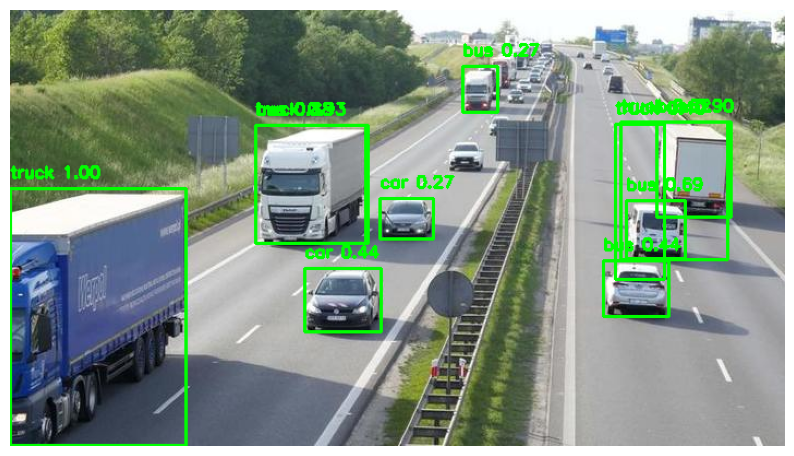

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the trained YOLO model (update the path as necessary)
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Function to detect vehicles in an image
def detect_vehicles(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Run inference
    results = model(image)

    # Assuming results is a list of results for each image
    detections = results[0]  # Get the first result

    # Extract bounding boxes
    boxes = detections.boxes.xyxy.cpu().numpy()  # Convert to numpy array for easier handling
    confidences = detections.boxes.conf.cpu().numpy()  # Get confidence scores
    class_ids = detections.boxes.cls.cpu().numpy()  # Get class IDs

    # Plot results
    for i in range(len(boxes)):  # Iterate over the bounding boxes
        box = boxes[i]
        conf = confidences[i]
        cls = int(class_ids[i])  # Convert to integer

        x1, y1, x2, y2 = map(int, box)  # Convert coordinates to integers
        label = f'{model.names[cls]} {conf:.2f}'  # Class name and confidence

        # Draw bounding box and label
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Convert BGR image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with detections
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/car-and-truck-traffic-on-the-highway-in-europe-poland-summer-day-free-video.jpg'  # Update with the path to your image
detect_vehicles(image_path)